### Load the test data

In [1]:
!unzip 'test_data.zip'

Archive:  test_data.zip
   creating: test_data/
   creating: test_data/images/
  inflating: test_data/images/994.png  
  inflating: test_data/images/995.png  
  inflating: test_data/images/996.png  
  inflating: test_data/images/997.png  
  inflating: test_data/images/998.png  
  inflating: test_data/images/999.png  
   creating: test_data/masks/
  inflating: test_data/masks/994.png  
  inflating: test_data/masks/995.png  
  inflating: test_data/masks/996.png  
  inflating: test_data/masks/997.png  
  inflating: test_data/masks/998.png  
  inflating: test_data/masks/999.png  


In [2]:
import numpy as np
from PIL import Image
import os

In [4]:
# Load test data from test_directory

# Define paths to your image and mask directories
image_dir = '/content/test_data/images'
mask_dir = '/content/test_data/masks'

# List all the PNG files in both directories (assumes the names are the same in both directories)
image_files = sorted(os.listdir(image_dir))
mask_files = sorted(os.listdir(mask_dir))

# Set the target size for resizing; done to ensure that all the samples are of same size
target_size = (256, 256)

# Create empty lists to store the arrays
images = []
masks = []

# Load images and masks into numpy arrays
for img_file, mask_file in zip(image_files, mask_files):
    img_path = os.path.join(image_dir, img_file)
    mask_path = os.path.join(mask_dir, mask_file)

    # Open the image and mask
    img = Image.open(img_path).convert("L")  # Convert to grayscale
    mask = Image.open(mask_path).convert("L")  # Convert to grayscale

    # Resize both image and mask to the target size
    img = img.resize(target_size)
    mask = mask.resize(target_size)

    # Convert to numpy arrays
    img_array = np.array(img)
    mask_array = np.array(mask)

    # Normalize the images and masks
    img_array = img_array / 255.0
    mask_array = mask_array / 255.0

    # Append to lists
    images.append(img_array)
    masks.append(mask_array)

# Convert the lists to numpy arrays
images = np.array(images)
masks = np.array(masks)



### Import helper functions from original notebook to build the model

In [5]:
!pip install nbimporter


In [7]:
!pip install keras-cv

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 650.7/650.7 kB 9.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 950.8/950.8 kB 31.3 MB/s eta 0:00:00


In [ ]:
import nbimporter
from Brain_Tumor_Segmentation_best import build_unet_model

# Load the U-Net architecture
model = build_unet_model()


### Load the saved weights

In [ ]:
# Load the previously saved weights
model.load_weights('best_unet_weights.h5')
print("Successfully loaded weights. Ready for inference!")

Successfully loaded weights. Ready for inference!


### Predict the masks for test images

In [11]:
import matplotlib.pyplot as plt

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


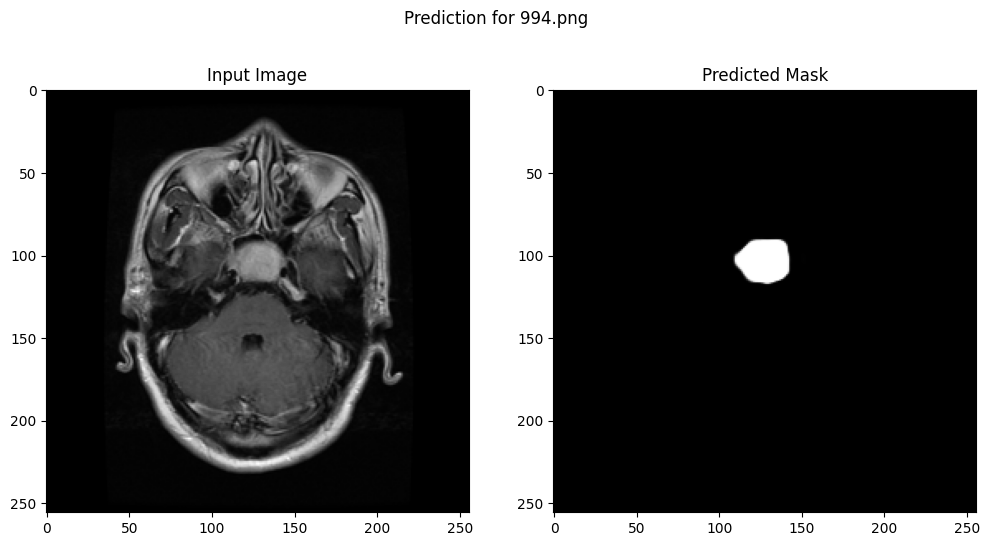

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


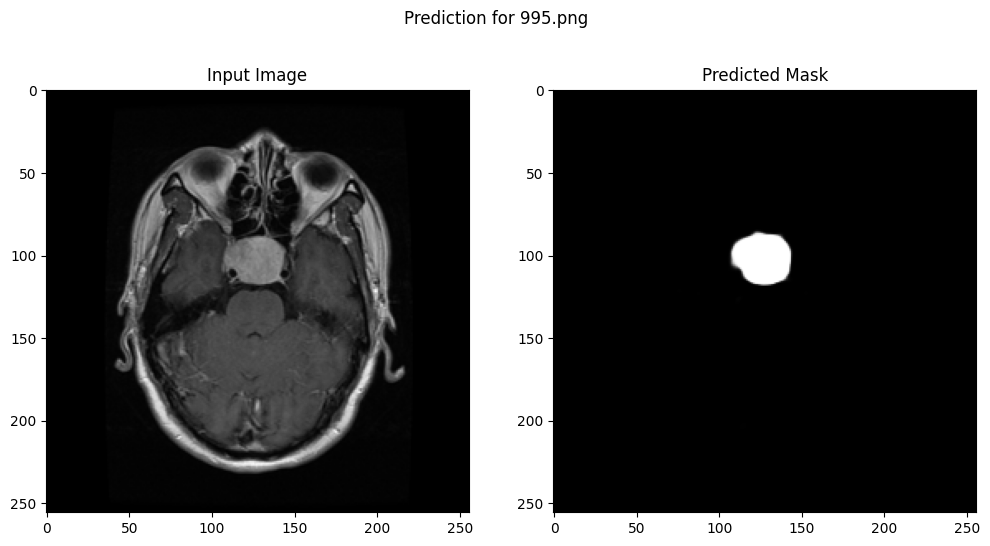

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


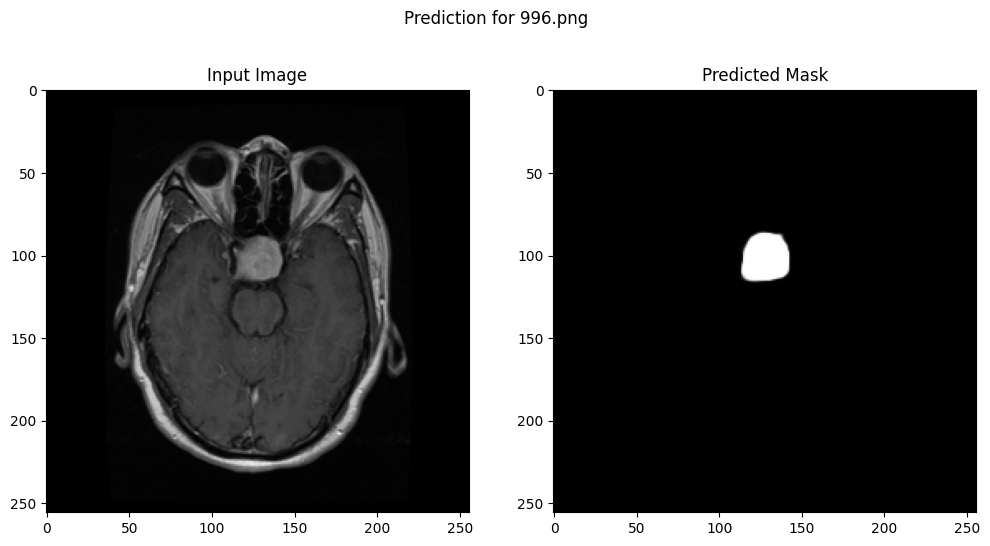

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


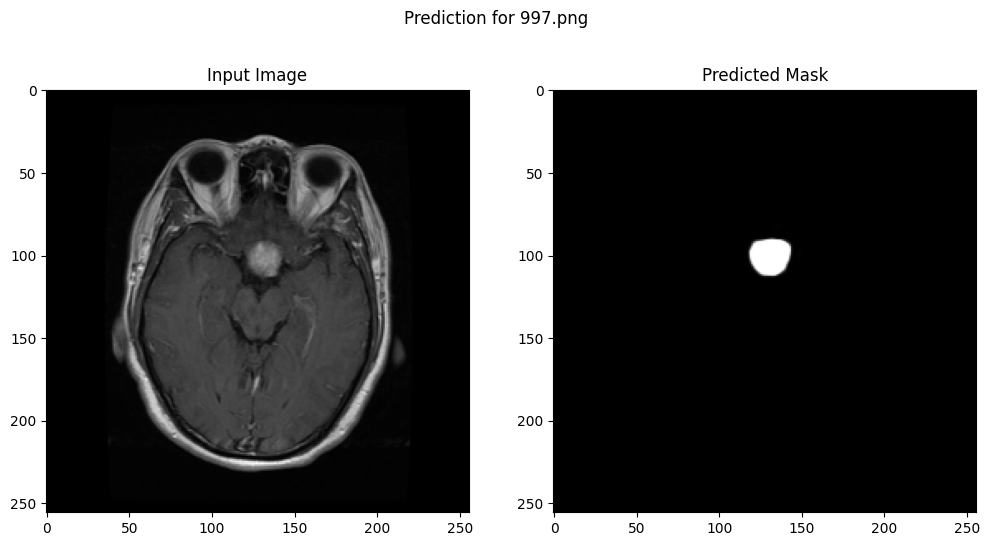

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


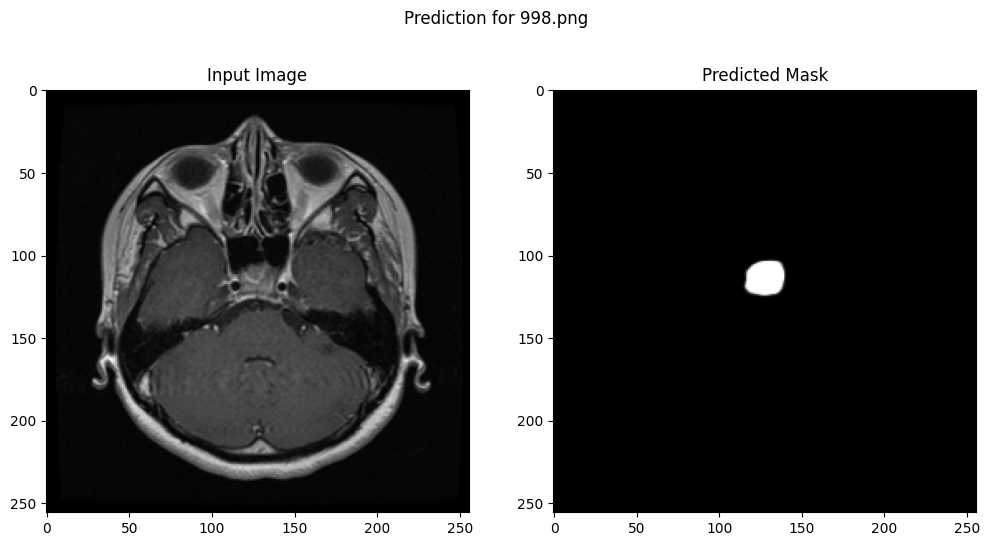

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


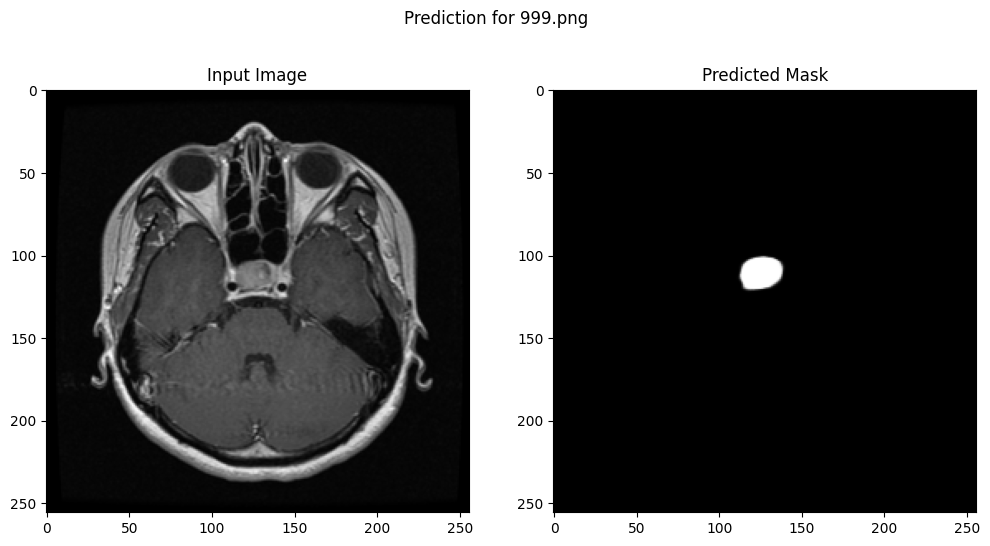

In [17]:
# Run inference on each image
i = 0
for image in images:
    i += 1

    # Reshape the image to include the channel dimension
    image = image.reshape(1, image.shape[0], image.shape[1], 1)  # Add batch and channel dimensions

    # Predict the segmentation mask
    predicted_mask = model.predict(image)

    # Visualize the input image and predicted mask
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.title("Input Image")
    # Squeeze the image to remove the batch and channel dimensions before displaying
    plt.imshow(image.squeeze(), cmap='gray') # Changed to display grayscale


    plt.subplot(1, 2, 2)
    plt.title("Predicted Mask")
    # Squeeze the predicted mask to remove the batch and channel dimensions before displaying
    plt.imshow(predicted_mask.squeeze(), cmap='gray')


    plt.suptitle(f"Prediction for {i+993}.png")
    plt.show()